In [33]:
from sklearn.datasets import load_boston


In [34]:
#数据加载
boston = load_boston()
x = boston['data']
y = boston['target']
print(x.shape)
print(y.shape)
print(y)
#因为y为数组类型，不满足要求，需要转化为列
y = y.reshape(-1,1)
print(y)

(506, 13)
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1

In [35]:
#数据规范化,这里采用正态分布规范化
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
print(x)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [36]:
#数据切分，转化成Tensor类型
import torch
x = torch.from_numpy(x).type(torch.FloatTensor)#本来这里想采用GPU的Tensor类型进行运算，但是后面报错说至少两维，这个目前还在查询原因
y = torch.from_numpy(y).type(torch.FloatTensor)

In [37]:
print(x)
print(x.type())
print(y.type())

tensor([[-0.4198,  0.2848, -1.2879,  ..., -1.4590,  0.4411, -1.0756],
        [-0.4173, -0.4877, -0.5934,  ..., -0.3031,  0.4411, -0.4924],
        [-0.4173, -0.4877, -0.5934,  ..., -0.3031,  0.3964, -1.2087],
        ...,
        [-0.4134, -0.4877,  0.1157,  ...,  1.1765,  0.4411, -0.9830],
        [-0.4078, -0.4877,  0.1157,  ...,  1.1765,  0.4032, -0.8653],
        [-0.4150, -0.4877,  0.1157,  ...,  1.1765,  0.4411, -0.6691]])
torch.FloatTensor
torch.FloatTensor


In [38]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [39]:
#构造网络
from torch import nn
model = nn.Sequential(
        nn.Linear(13,10),#输入层到隐藏层，从13维降为10维
        nn.ReLU(),
        nn.Linear(10,1)#隐藏层到出书层，从10维到1维
)

In [42]:
#定义优化器和损失函数
criterion = nn.MSELoss() #损失函数
optimizer = torch.optim.RMSprop(model.parameters(),lr=0.01) #课程中采用的是比较好的adam优化器，这里比对进行测试，用RMSprop优化器

In [43]:
#训练
max_epoch = 500
iter_loss = []
for i in range(max_epoch):
    #前向传播
    y_pred = model(train_x)
    #计算loss
    loss = criterion(y_pred,train_y)
    print(i,loss.item())
    iter_loss.append(loss.item())
    #清空之前的梯度
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #权重调整
    optimizer.step()

0 10.355369567871094
1 10.129647254943848
2 28.65199089050293
3 11.931471824645996
4 11.592141151428223
5 11.068147659301758
6 10.344414710998535
7 9.890703201293945
8 9.666192054748535
9 9.564188957214355
10 9.514784812927246
11 9.484225273132324
12 9.461647987365723
13 9.442424774169922
14 9.425355911254883
15 9.408845901489258
16 9.392717361450195
17 9.37671947479248
18 9.36082649230957
19 9.345321655273438
20 9.329795837402344
21 9.314582824707031
22 9.299654006958008
23 9.28488826751709
24 9.270320892333984
25 9.255648612976074
26 9.241270065307617
27 9.227038383483887
28 9.212862968444824
29 9.198848724365234
30 9.18518352508545
31 9.17146110534668
32 9.15744400024414
33 9.141984939575195
34 9.126728057861328
35 9.108438491821289
36 9.091399192810059
37 9.0746431350708
38 9.058906555175781
39 9.042717933654785
40 9.027008056640625
41 9.010324478149414
42 8.994956016540527
43 8.980297088623047
44 8.965997695922852
45 8.951676368713379
46 8.937784194946289
47 8.923309326171875
48 8

379 8.033514022827148
380 8.028349876403809
381 8.001800537109375
382 7.986673831939697
383 7.9587812423706055
384 7.939953327178955
385 7.92119836807251
386 7.910135269165039
387 7.903883934020996
388 7.894142150878906
389 7.8914313316345215
390 7.885077476501465
391 7.890343189239502
392 7.8857035636901855
393 7.890328884124756
394 7.886806964874268
395 7.890613079071045
396 7.886500358581543
397 7.895760536193848
398 7.892198085784912
399 7.893762588500977
400 7.884851932525635
401 7.886331558227539
402 7.879059791564941
403 7.880216598510742
404 7.873558044433594
405 7.874683380126953
406 7.866403579711914
407 7.863757610321045
408 7.855299949645996
409 7.8602118492126465
410 7.852455139160156
411 7.851405143737793
412 7.846078872680664
413 7.846133232116699
414 7.842158317565918
415 7.84279203414917
416 7.839735984802246
417 7.84728479385376
418 7.847541809082031
419 7.852755546569824
420 7.852679252624512
421 7.861203193664551
422 7.864966869354248
423 7.871391773223877
424 7.876

In [44]:
#测试
output = model(test_x)
predict_list = output.detach().numpy()
print(predict_list)

[[33.84343  ]
 [13.557229 ]
 [17.68054  ]
 [17.715998 ]
 [20.813683 ]
 [19.67082  ]
 [18.25149  ]
 [17.717926 ]
 [32.321682 ]
 [18.16779  ]
 [47.80948  ]
 [25.394318 ]
 [25.84857  ]
 [22.976572 ]
 [29.239956 ]
 [16.82924  ]
 [22.473103 ]
 [24.372055 ]
 [23.815983 ]
 [34.90856  ]
 [28.499977 ]
 [17.712133 ]
 [15.03117  ]
 [22.840517 ]
 [30.623314 ]
 [23.979826 ]
 [25.588568 ]
 [30.347435 ]
 [22.272848 ]
 [14.2501745]
 [29.227121 ]
 [12.337341 ]
 [51.195316 ]
 [22.828358 ]
 [42.75085  ]
 [14.954558 ]
 [26.686829 ]
 [21.46359  ]
 [18.114613 ]
 [17.813408 ]
 [16.444666 ]
 [13.355926 ]
 [20.87787  ]
 [38.49898  ]
 [14.375374 ]
 [17.889223 ]
 [17.455456 ]
 [16.717918 ]
 [22.256153 ]
 [43.68022  ]
 [14.392091 ]
 [24.292168 ]
 [25.907118 ]
 [18.090355 ]
 [10.7866955]
 [17.177605 ]
 [26.091627 ]
 [24.307402 ]
 [12.217606 ]
 [29.860811 ]
 [ 9.661021 ]
 [10.9747305]
 [25.528046 ]
 [34.708183 ]
 [25.32843  ]
 [27.530622 ]
 [ 9.5431795]
 [17.829618 ]
 [17.060099 ]
 [30.245134 ]
 [17.378408 ]
 [27.6

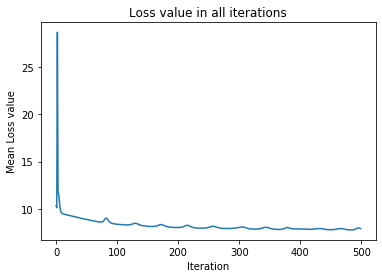

In [47]:
#绘制不同的iteration的loss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(max_epoch)
y = np.array(iter_loss)

plt.plot(x,y)
plt.title('Loss value in all iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Loss value')
plt.show()

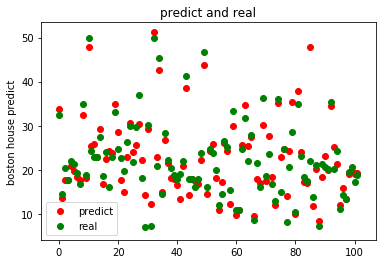

In [46]:
#查看真实值与预测值的散点图
x = np.arange(test_x.shape[0])
y1 = np.array(predict_list)#预测值
y2 = np.array(test_y)#实际值

line1 = plt.scatter(x,y1,c='red')
line2 = plt.scatter(x,y2,c='green')
plt.legend([line1,line2],['predict','real'])
plt.title('predict and real')
plt.ylabel('boston house predict')
plt.show()